### `Lab 01`

In [1]:
import tensorflow as tf

import os, pathlib, warnings, urllib, shutil

warnings.filterwarnings("ignore")

#### `Helper`

In [2]:
def GitFile(local, user, repo, folder, gitfile, branch='main'):
  """
  Download GitHub Raw File if Unavailable Locally
  """
  if not os.path.exists(local):

    url = f"https://raw.githubusercontent.com/{user}/{repo}/{branch}/{folder}/{gitfile}"

    urllib.request.urlretrieve(url, local)

  return pathlib.Path(local)

In [ ]:
GitFile("Helplot.py", "Kelnit", "Int", "Hut", "Helper.py")

GitFile("Helper.py", "Kelnit", "Int", "Hart", "Helper.py")

PosixPath('Helper.py')

#### `Git Origin`

In [4]:
giturl = "https://github.com/dicodingacademy/assets/releases/download/release/"

dataset = "rockpaperscissors.zip"

urllib.request.urlretrieve(os.path.join(giturl, dataset), dataset)

shutil.unpack_archive('rockpaperscissors.zip', '/content', 'zip')

In [5]:
root = "/content/rockpaperscissors/rps-cv-images"

!rm /content/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt

os.listdir(root)

['paper', 'rock', 'scissors']

#### `Feature Engineer`

In [6]:
rescale = 1.0 / 255.0

dictlist = {'rescale':rescale, 'fill_mode':'nearest', 'validation_split':0.2}

dictlist['shear_range'] = 0.1

dictlist['rotation_range'] = 10

dictlist['horizontal_flip'] = True

trainset = tf.keras.preprocessing.image.ImageDataGenerator(**dictlist)

In [ ]:
flowlist = {'target_size':(150, 150), 'batch_size':128, 'class_mode':'categorical'}

train = trainset.flow_from_directory(root, subset='training', **flowlist)

In [8]:
train.class_indices.keys()

dict_keys(['paper', 'rock', 'scissors'])

In [9]:
dictlist = {'rescale':rescale, 'fill_mode':'nearest', 'validation_split':0.2}

testset = tf.keras.preprocessing.image.ImageDataGenerator(**dictlist)

In [ ]:
flowlist = {'target_size':(150, 150), 'batch_size':128, 'class_mode':'categorical'}

test = testset.flow_from_directory(root, subset='validation', **flowlist)

#### `Model`

In [11]:
from tensorflow.keras.models import Sequential

from tensorflow.keras import layers

import warnings; warnings.filterwarnings('ignore')

model = Sequential([
  # Input
  layers.Input((150, 150, 3)),
  # Convolutional, Relu, Pooling I
  layers.Conv2D(16, (3, 3)),
  layers.Activation('relu'),
  layers.MaxPool2D((2, 2)),
  # Convolutional, Relu, Pooling II
  layers.Conv2D(32, (3, 3)),
  layers.Activation('relu'),
  layers.MaxPool2D((2, 2)),
  # Convolutional, Relu, Pooling III
  layers.Conv2D(64, (3, 3)),
  layers.Activation('relu'),
  layers.MaxPool2D((2, 2)),
  # Flatten & Relu
  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(128),
  layers.Activation('relu'),
  # Final
  layers.Dense(3, activation="softmax")
])

In [12]:
loss = "categorical_crossentropy"

model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

In [13]:
hist = model.fit(train, validation_data=test, epochs=10)

#### `Model Test`

In [14]:
model.evaluate(train, verbose=False)

[0.13025182485580444, 0.9628783464431763]

In [15]:
model.evaluate(test, verbose=False)

[0.1799013614654541, 0.9405034184455872]

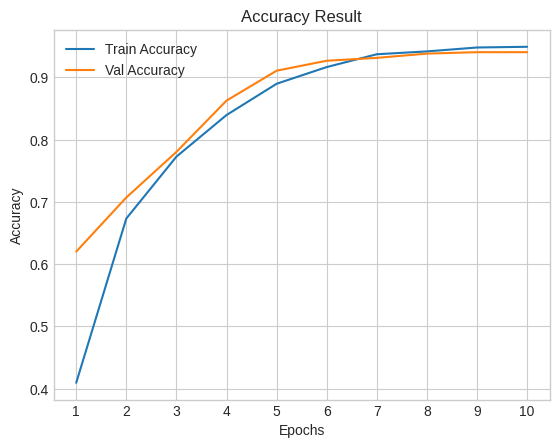

In [16]:
from Helplot import Helplot

plot = Helplot(hist)

plot.Relplot

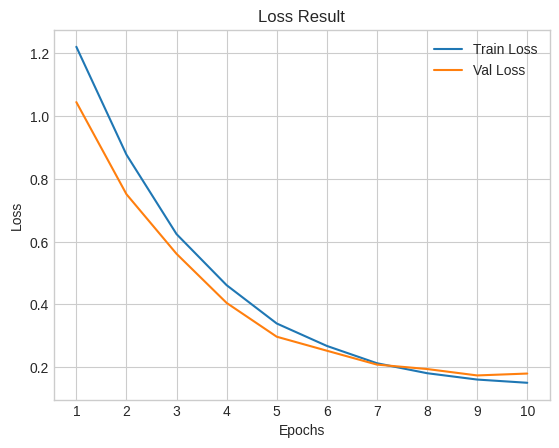

In [17]:
plot.Falplot

In [ ]:
ModelFolder = "/content/Modelite"

model.export(ModelFolder)

#### `TensorFlow Lite`

In [19]:
from Helper import Helite

pathfile = "HutModel.tflite"

Helite("/content/Modelite", pathfile)

PosixPath('HutModel.tflite')

In [20]:
os.path.getsize(pathfile) / float(2**20)

2.2902374267578125

#### `Test TensorFlow Lite`

In [21]:
from Helper import Imfile

labeler = list(train.class_indices.keys())

paper = "/content/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png"

tester = Imfile(paper, (150, 150))

In [22]:
interpreter = tf.lite.Interpreter(model_path=pathfile)

interpreter.get_signature_list()

{'serving_default': {'inputs': ['keras_tensor'], 'outputs': ['output_0']}}

In [23]:
lite_interpreter = interpreter.get_signature_runner('serving_default')

lite_interpreter

In [24]:
tester = lite_interpreter(keras_tensor=tester)['output_0']

tester

array([[0.03658328, 0.19771264, 0.76570404]], dtype=float32)

In [25]:
labeler[tf.math.argmax(tester[0])]

'scissors'

#### `Model II`

In [ ]:
ModelFolder = "/content/ModelContent"

ModelSerial = "1"

ModuleFolder = os.path.join(ModelFolder, ModelSerial)

model.export(ModuleFolder)

In [ ]:
!zip -r ModelContent.zip /content/ModelContent